In [1]:
import pandas as pd
import numpy as np

import mysql.connector
from sqlalchemy import create_engine
import pandas.io.sql as psql
import sqlalchemy

from dateutil import parser
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
database_username = 'smarsproddbuser@mbt-smars-mysql'
database_password = 'modern@1234'
database_ip       = 'mbt-smars-mysql.mysql.database.azure.com'
database_name     = 'mainschema'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

In [3]:
perf2016 = pd.read_sql('SELECT * FROM mcbrokerperformance2016', con=database_connection)
del perf2016['index']
perf2016.rename(columns = {'Hit Ratio':'hr2016', 'Avg. Growth':'ag2016', 
                              'Total Recos':'tr2016'}, inplace = True)
perf2016

,Name,hr2016,ag2016,tr2016
0,Motilal Oswal,44,22,109
1,Arihant Capital,50,33,2
2,ICICI Securties,0,0,1
3,AUM Capital,100,52,7
4,Edelweiss,55,25,120
...,...,...,...,...
89,Khambatta securities,50,46,2
90,Shubham Agarwal,50,4,2
91,Mayuresh Joshi,100,52,1
92,Simi Bhaumik,100,16,1


In [4]:
perf2017 = pd.read_sql('SELECT * FROM mcbrokerperformance2017', con=database_connection)
del perf2017['index']
perf2017.rename(columns = {'Hit Ratio':'hr2017', 'Avg. Growth':'ag2017', 
                              'Total Recos':'tr2017'}, inplace = True)
perf2017

,Name,hr2017,ag2017,tr2017
0,ICICI Direct,54,13,48
1,Kotak Securities,20,2,10
2,HDFC Securities,45,9,20
3,KR Choksey,46,12,15
4,Motilal Oswal,53,30,49
5,Nirmal Bang,0,0,1
6,Edelweiss,51,14,54
7,Dalmia Securities,100,49,2
8,Khambatta Securities,66,12,6
9,Axis Direct,55,9,47


In [5]:
perf2018 = pd.read_sql('SELECT * FROM mcbrokerperformance2018', con=database_connection)
del perf2018['index']
perf2018.rename(columns = {'Hit Ratio':'hr2018', 'Avg. Growth':'ag2018', 
                              'Total Recos':'tr2018'}, inplace = True)
perf2018

,Name,hr2018,ag2018,tr2018
0,ICICI Direct,47,24,92
1,Geojit,0,0,1
2,Nalanda Securities,42,7,28
3,SPA Securities,100,7,1
4,Anand Rathi,47,13,38
5,Bonanza,50,17,2
6,Rupak De​,100,25,1
7,Kotak Securities,53,471,30
8,HDFC Securities,51,136,100
9,Cholamandalam Securities,44,34,29


In [6]:
#del dfinalperf

In [7]:
dfinalperf = perf2016.copy()

In [8]:
dfinalperf = dfinalperf.merge(perf2017,on = 'Name', how = 'outer')
dfinalperf = dfinalperf.merge(perf2018,on = 'Name', how = 'outer')

In [9]:
dfinalperf

,Name,hr2016,ag2016,tr2016,hr2017,ag2017,tr2017,hr2018,ag2018,tr2018
0,Motilal Oswal,44.0,22.0,109.0,53.0,30.0,49.0,45.0,23.0,86.0
1,Arihant Capital,50.0,33.0,2.0,NaN,NaN,NaN,100.0,0.0,2.0
2,ICICI Securties,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AUM Capital,100.0,52.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Edelweiss,55.0,25.0,120.0,51.0,14.0,54.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
136,Vikas Jain,NaN,NaN,NaN,NaN,NaN,NaN,100.0,6.0,2.0
137,Shailendra Kumar,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.0,4.0
138,Axis Capital,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
139,Prashanth Tapse,NaN,NaN,NaN,NaN,NaN,NaN,40.0,10.0,5.0


In [10]:
dfinal = pd.DataFrame()
for index, row in dfinalperf.iterrows():
    broker = row['Name']
    
    tr2016 = row['tr2016']
    ag2016 = row['ag2016']
    hr2016 = row['hr2016']
    
    tr2017 = row['tr2017']
    ag2017 = row['ag2017']
    hr2017 = row['hr2017']
    
    tr2018 = row['tr2018']
    ag2018 = row['ag2018']
    hr2018 = row['hr2018']
     
    tr = 0
    hr = 0
    ag = 0
    
    if not np.isnan(tr2016):
        tr = tr + tr2016
        ag = ag + (ag2016 * tr2016)
        hr = hr + (hr2016 * tr2016)
        
    if not np.isnan(tr2017):
        tr = tr + tr2017
        ag = ag + (ag2017 * tr2017)
        hr = hr + (hr2017 * tr2017)
        
    if not np.isnan(tr2018):
        tr = tr + tr2018
        ag = ag + (ag2018 * tr2018)
        hr = hr + (hr2018 * tr2018)
    
    hr = int(hr/tr)
    ag = int(ag/tr)
    
    #print ("Broker : ",broker,"Hit Ratio : ",hr,"Avg. Growth : ",ag,"Total Recos. : ",tr)
    dfinal = dfinal.append({'Name':broker,'Hit Ratio':hr,'Avg. Growth':ag,'Total Recos':tr},ignore_index=True)
dfinal = dfinal[['Name','Hit Ratio','Avg. Growth','Total Recos']]
df = dfinal.copy()
dfinal

,Name,Hit Ratio,Avg. Growth,Total Recos
0,Motilal Oswal,46.0,23.0,244.0
1,Arihant Capital,75.0,16.0,4.0
2,ICICI Securties,0.0,0.0,1.0
3,AUM Capital,100.0,52.0,7.0
4,Edelweiss,53.0,21.0,174.0
...,...,...,...,...
136,Vikas Jain,100.0,6.0,2.0
137,Shailendra Kumar,25.0,0.0,4.0
138,Axis Capital,0.0,0.0,1.0
139,Prashanth Tapse,40.0,10.0,5.0


<function matplotlib.pyplot.show(*args, **kw)>

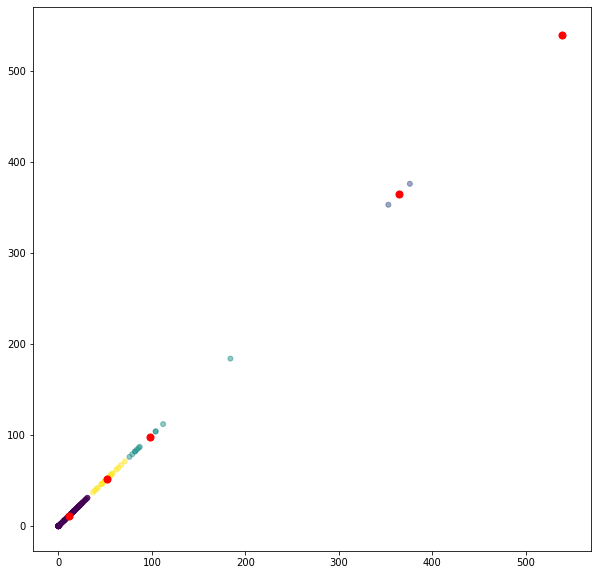

In [11]:
X1 = df[['Avg. Growth','Avg. Growth']]
model1 = KMeans(n_clusters=5).fit(X1)
centroids1 = model1.cluster_centers_
sortedcentroids1 = centroids1[:,0].copy()
sortedcentroids1.sort(axis=0)
labeldict1 = {}
for i in centroids1[:,0] :
    x = list(sortedcentroids1).index(i)
    y = list(centroids1[:,0]).index(i)
    labeldict1[y] = x
    unsortedlabels1 = model1.predict(X1)
sortedlabels1 = []
for element in unsortedlabels1 :
    sortedlabels1.append(labeldict1[element]+1)

plt.figure(figsize=(10,10))
plt.scatter(df['Avg. Growth'], df['Avg. Growth'], c= unsortedlabels1, s=25, alpha=0.5)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

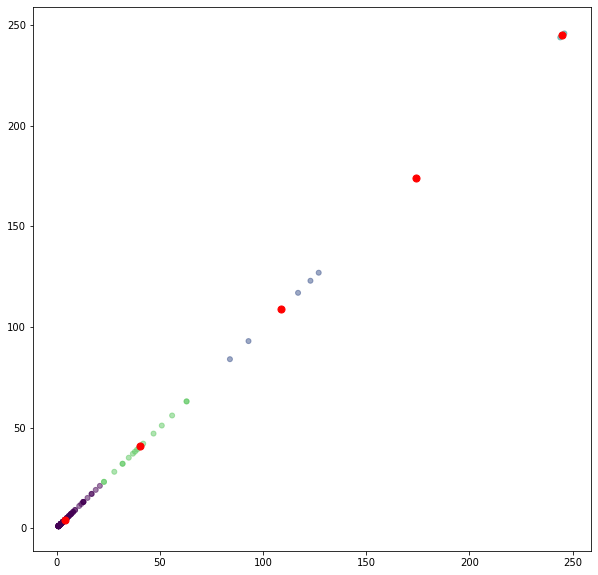

In [12]:
X2 = df[['Total Recos','Total Recos']]
model2 = KMeans(n_clusters=5).fit(X2)
centroids2 = model2.cluster_centers_
sortedcentroids2 = centroids2[:,0].copy()
sortedcentroids2.sort(axis=0)
labeldict2 = {}
for i in centroids2[:,0] :
    x = list(sortedcentroids2).index(i)
    y = list(centroids2[:,0]).index(i)
    labeldict2[y] = x
    unsortedlabels2 = model2.predict(X2)
sortedlabels2 = []
for element in unsortedlabels2 :
    sortedlabels2.append(labeldict2[element]+1)

plt.figure(figsize=(10,10))
plt.scatter(df['Total Recos'], df['Total Recos'], c= unsortedlabels2, s=25, alpha=0.5)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

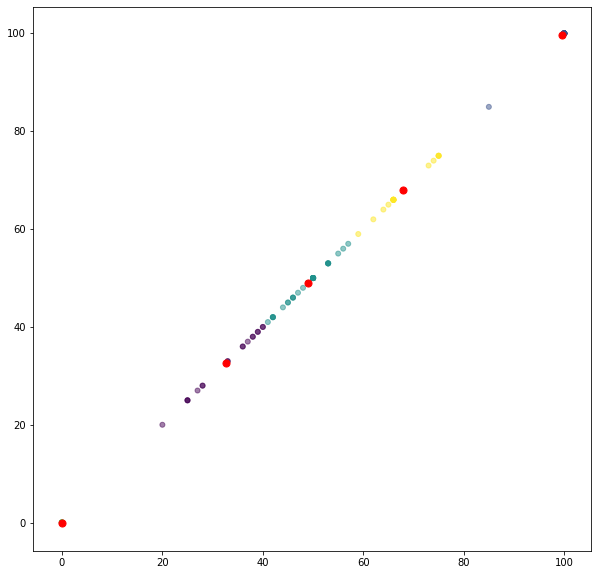

In [13]:
X3 = df[['Hit Ratio','Hit Ratio']]
model3 = KMeans(n_clusters=5).fit(X3)
centroids3 = model3.cluster_centers_
sortedcentroids3 = centroids3[:,0].copy()
sortedcentroids3.sort(axis=0)
labeldict3 = {}
for i in centroids3[:,0] :
    x = list(sortedcentroids3).index(i)
    y = list(centroids3[:,0]).index(i)
    labeldict3[y] = x
    unsortedlabels3 = model3.predict(X3)
sortedlabels3 = []
for element in unsortedlabels3 :
    sortedlabels3.append(labeldict3[element]+1)

plt.figure(figsize=(10,10))
plt.scatter(df['Hit Ratio'], df['Hit Ratio'], c= unsortedlabels3, s=25, alpha=0.5)
plt.scatter(centroids3[:, 0], centroids3[:, 1], c='red', s=50)
plt.show

In [14]:
dfanalysis = pd.DataFrame({'broker': df['Name'], 'Hit Ratio': sortedlabels3,'Avg. Growth' : sortedlabels1, 'Total Recos' : sortedlabels2})
dfanalysis

,broker,Hit Ratio,Avg. Growth,Total Recos
0,Motilal Oswal,3,1,5
1,Arihant Capital,4,1,1
2,ICICI Securties,1,1,1
3,AUM Capital,5,2,1
4,Edelweiss,3,1,4
...,...,...,...,...
136,Vikas Jain,5,1,1
137,Shailendra Kumar,2,1,1
138,Axis Capital,1,1,1
139,Prashanth Tapse,2,1,1


In [15]:
dictstar1 = {1:1,   2:0.8, 3:0.6, 4:0.4, 5:0 }
dictstar2 = {1:0.8, 2:1,   3:0.8, 4:0.6, 5:0.4 }
dictstar3 = {1:0.6, 2:0.8, 3:1,   4:0.8, 5:0.6 }
dictstar4 = {1:0.4, 2:0.6, 3:0.8, 4:1,   5:0.6 }
dictstar5 = {1:0.2, 2:0.4, 3:0.6, 4:0.8, 5:1 }

In [16]:
star = []
for index, row in dfanalysis.iterrows():
    hr = row['Hit Ratio']
    ag = row['Avg. Growth']
    tr = row['Total Recos']
    probabilities = []
    probabilities.append(dictstar1[hr]*dictstar1[ag]*dictstar1[tr]) 
    probabilities.append(dictstar2[hr]*dictstar2[ag]*dictstar2[tr]) 
    probabilities.append(dictstar3[hr]*dictstar3[ag]*dictstar3[tr]) 
    probabilities.append(dictstar4[hr]*dictstar4[ag]*dictstar4[tr]) 
    probabilities.append(dictstar5[hr]*dictstar5[ag]*dictstar5[tr]) 
    rating = probabilities.index(max(probabilities))+1
    star.append(rating)

In [17]:
dfanalysis['Rating'] = star
dfanalysis

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,Motilal Oswal,3,1,5,3
1,Arihant Capital,4,1,1,1
2,ICICI Securties,1,1,1,1
3,AUM Capital,5,2,1,2
4,Edelweiss,3,1,4,3
...,...,...,...,...,...
136,Vikas Jain,5,1,1,2
137,Shailendra Kumar,2,1,1,1
138,Axis Capital,1,1,1,1
139,Prashanth Tapse,2,1,1,1


In [18]:
df2016 = pd.read_sql('SELECT * FROM mcfinalrating2016', con=database_connection)
del df2016['index']
df2016

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,Motilal Oswal,2,2,5,2
1,Arihant Capital,3,2,1,2
2,ICICI Securties,1,1,1,1
3,AUM Capital,5,3,1,3
4,Edelweiss,3,2,5,3
...,...,...,...,...,...
89,Khambatta securities,3,3,1,3
90,Shubham Agarwal,3,1,1,1
91,Mayuresh Joshi,5,3,1,3
92,Simi Bhaumik,5,2,1,2


In [19]:
df2017 = pd.read_sql('SELECT * FROM mcfinalrating2017', con=database_connection)
del df2017['index']
df2017

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,ICICI Direct,3,2,5,3
1,Kotak Securities,2,1,3,2
2,HDFC Securities,3,2,4,3
3,KR Choksey,3,2,3,3
4,Motilal Oswal,3,3,5,3
5,Nirmal Bang,1,1,1,1
6,Edelweiss,3,2,5,3
7,Dalmia Securities,5,4,1,3
8,Khambatta Securities,4,2,2,2
9,Axis Direct,3,2,5,3


In [20]:
df2018 = pd.read_sql('SELECT * FROM mcfinalrating2018', con=database_connection)
del df2018['index']
df2018

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,ICICI Direct,3,2,5,3
1,Geojit,1,1,1,1
2,Nalanda Securities,3,1,3,3
3,SPA Securities,5,1,1,2
4,Anand Rathi,3,1,4,3
5,Bonanza,3,2,1,2
6,Rupak De​,5,2,1,2
7,Kotak Securities,3,5,3,3
8,HDFC Securities,3,3,5,3
9,Cholamandalam Securities,3,2,3,3


In [54]:
df20161718 = pd.concat([df2016, df2017,df2018], ignore_index=True)
df20161718

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,KRChoksey,3,3,3,3
1,AUM Capital,4,4,1,4
2,Religare,4,2,4,4
3,Enochventures.com,2,2,1,2
4,Edelweiss,3,2,4,3
...,...,...,...,...,...
165,BP Wealth,1,1,1,1
166,Khambatta Securities,1,1,1,1
167,Ashika Stock Broking,1,1,1,1
168,Investment Imperative,1,1,1,1


In [55]:
Xtrain = df20161718[['Hit Ratio','Avg. Growth','Total Recos']].values
Ytrain = df20161718['Rating'].values
Xtest = dfanalysis[['Hit Ratio','Avg. Growth','Total Recos']].values

In [56]:
clf = GaussianNB()
clf.fit(Xtrain, Ytrain)
GaussianNB()
Ytest = clf.predict(Xtest)

In [57]:
score = clf.score(Xtest,dfanalysis['Rating'].values)
score

0.918918918918919

In [58]:
confusion_matrix(dfanalysis['Rating'],Ytest)

array([[13,  0,  0,  0,  0],
       [ 0, 34,  3,  0,  0],
       [ 0,  0, 21,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0]], dtype=int64)

In [59]:
del dfanalysis['Rating']
dfanalysis['Rating'] = Ytest
dfanalysis

,broker,Hit Ratio,Avg. Growth,Total Recos,Rating
0,KRChoksey,4,3,3,3
1,AUM Capital,3,2,1,2
2,Religare,4,2,3,3
3,Enochventures.com,3,2,1,2
4,Edelweiss,3,3,5,3
...,...,...,...,...,...
69,Ashwanigujral.com,5,4,1,3
70,Investec Securities,4,2,1,2
71,Globe Capital Market,1,1,1,1
72,Sushil Finance,5,3,1,3


In [60]:
dfanalysis.to_sql(con=database_connection, name='finalrating', if_exists='replace')

In [61]:
#from sklearn.naive_bayes import MultinomialNB

In [62]:
#clf1 = MultinomialNB()
#clf1.fit(Xtrain, Ytrain)
#MultinomialNB()
#Ytest = clf1.predict(Xtest)


In [63]:
#score = clf1.score(Xtest,dfanalysis['Rating'].values)
#score
#0.5405405405405406